# IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [1]:
%reload_ext watermark
%watermark -a "Wenjing Ma" -d -u -n -t -z

Wenjing Ma 
last updated: 2020-02-13 14:06:12 EST


#### Load libraries

In [2]:
import pandas as pd
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

#### Load data
note: include test for this chunk from previous homework

In [3]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col=0, sep='\t')
len(counts) == 14944
# counts.head()

True

#### Prepare data for PCA Analysis

In [4]:
counts_transpose = counts.T
group = ['Control']*7
group.extend(['Case']*7)
counts_transpose['group'] = group

features = pd.Series(counts_transpose.columns)[0:14944]
feature_arr = counts_transpose.loc[:, features].values # get genes
target_arr = counts_transpose.loc[:, ['group']].values # get group, not used for standardization

# stardardize to compare the features
fitted_features = StandardScaler().fit_transform(feature_arr)

#### Determine Principal Components
note: include test for this chunk from previous homework

In [5]:
random_seed = 20202
random.seed(random_seed)

pca = PCA(n_components=2, random_state=random_seed)
pcs = pca.fit_transform(fitted_features)
# print(pca.explained_variance_ratio_)
pdf = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
pdf.index = counts_transpose.index
target_df = counts_transpose[['group']]
new_df = pd.concat([pdf, target_df], axis=1)

#### Graph the principal components by sample group

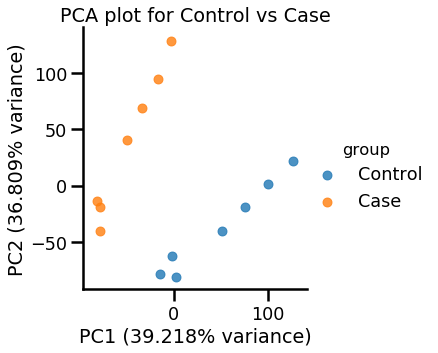

In [6]:
sns.set_context("poster", font_scale=0.8)
g = sns.lmplot(data=new_df, 
           x='PC1', y='PC2',
          fit_reg=False,
          hue='group',
          legend=True,
          scatter_kws={"s":80})

g.set_axis_labels("PC1 ("+str(round(pca.explained_variance_ratio_[0]*100,3))+"% variance)",
                 "PC2 ("+str(round(pca.explained_variance_ratio_[1]*100,3))+"% variance)")

g.set(title="PCA plot for Control vs Case")

#### Interpret the graph for your principal investigator using explained variance

In [7]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Aproximately 39.2 % of the variability between these sample groups is explained by a sample being either a case or a control. Approximately 36.8 % can be attributed to another variable unaccounted for in the experimental design.

#### Report Session Information


In [8]:
sinfo()

-----
numpy       1.18.1
pandas      0.25.3
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.11.1
jupyter_client      5.3.4
jupyter_core        4.6.1
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 16:15:59) [Clang 4.0.1 (tags/RELEASE_401/final)]
macOS-10.15.2-x86_64-i386-64bit
4 logical CPU cores, i386
-----
Session information updated at 2020-02-13 14:06
